In [11]:
# 1. 
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.filters import threshold_local
# from skimage import measure

In [12]:
# 2.
image = cv2.imread('data/images/test5.jpg')
print("Height: {},Width: {}".format(*image.shape[:2]))

Height: 499,Width: 750


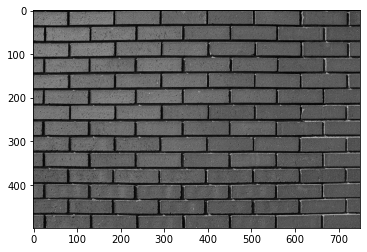

In [13]:
# 3.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

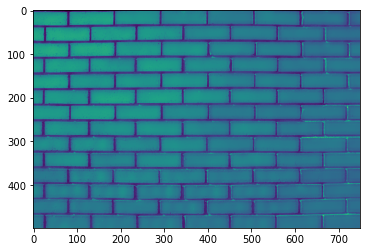

In [14]:
# 4.
# kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# blurred = cv2.filter2D(gray , -1, kernel)
blurred = cv2.bilateralFilter(gray, 21, 41, 41)
plt.imshow(blurred)

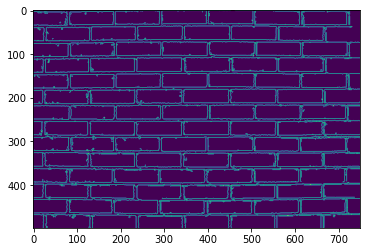

In [15]:
# 5.
# Watch for the argument
edged = cv2.Canny(blurred, 50, 200)
plt.imshow(edged)

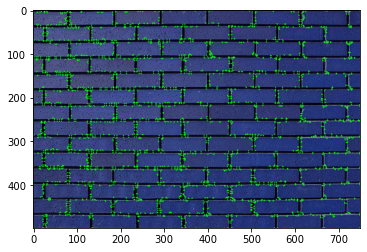

In [6]:
# 6.
# Experimental setup
thresh = threshold_local(blurred, 21, offset=15).astype("uint8")*255
mask = cv2.bitwise_not(edged)
thresh = cv2.bitwise_and(thresh, thresh, mask=mask)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
# plt.imshow(thresh)
thresh_copy = thresh.copy()
(cnts, _) = cv2.findContours(thresh_copy, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

output = image.copy()
# for c in cnts:
#     x,y,w,h = cv2.boundingRect(c)
#     output = cv2.rectangle(output,(x,y),(x+w,y+h),(0,255,0),2)
# plt.imshow(output)
for c in cnts:
    cv2.drawContours(output, c, -1, (0, 255, 0), 2)
plt.imshow(output)
# Jump to line 


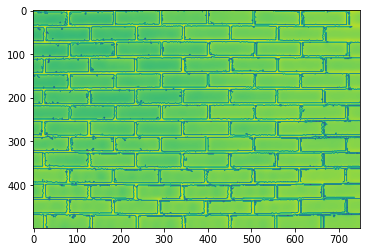

In [16]:
thresh = threshold_local(blurred, 21, offset=15).astype("uint8")*255

mask = cv2.bitwise_not(edged)
thresh = cv2.bitwise_and(thresh, thresh, mask=mask)
plt.imshow(thresh)

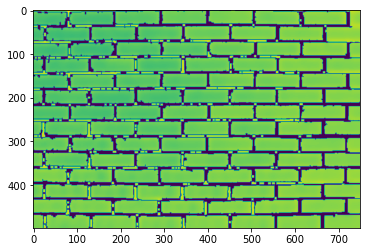

In [17]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.imshow(thresh)

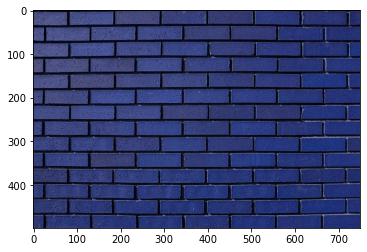

In [18]:
thresh_copy = thresh.copy()
(cnts, _) = cv2.findContours(thresh_copy, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

output = image.copy()
plt.imshow(output)

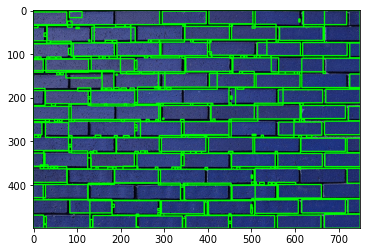

In [19]:
# Experimental setup
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    output = cv2.rectangle(output,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(output)

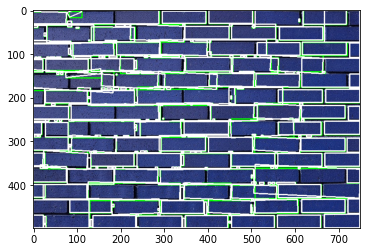

In [20]:
# Experimental setup
for c in cnts:
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    im = cv2.drawContours(output,[box], -1, (255,255,255), 2)
plt.imshow(im)

In [ ]:
for c in cnts:
    cv2.drawContours(output, c, -1, (0, 255, 0), 2)
plt.imshow(output)

In [7]:
print("# of bricks:", len(cnts))
cv2.imshow("Bricks", output)
cv2.waitKey(0)

# of bricks: 195


32

In [8]:
num_labels, labels_im = cv2.connectedComponents(thresh, connectivity=8)
labels = measure.label(thresh, background=0)
mask = np.zeros(thresh.shape, dtype="uint8")

for (i, label) in enumerate(np.unique(labels_im)):
    if label == 0:
        continue

    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels_im == label] = 255
    numPixels = cv2.countNonZero(labelMask)

    mask = cv2.add(mask, labelMask)
    cv2.imshow("Mask", mask)
    cv2.waitKey(0)
print("# of bricks (accurate):", len(np.unique(labels_im)))

# of bricks (accurate): 156
